# Final Data Science Tutorial - Evaluating The Risk of Making Investments in India

## Motivation
As an Overseas Citizen of India with a deep personal interest in the financial opportunities available in my home country, I recently embarked on a project to evaluate the potential risks and rewards of investing in Indian banks. One of the things that caught my attention was the fact that interest rates on fixed rate deposits in India are significantly higher than those for similar investments, such as Certificates of Deposit, in the United States. While this difference in interest rates could potentially translate into higher returns for investors, I was concerned about the impact that fluctuations in the exchange rate between the Indian Rupee and the US Dollar might have on the value of my investment.

To address these concerns, I decided to use a machine learning regression model to predict the future exchange rate between the Rupee and the Dollar, and to compare the potential returns of a long-term, fixed rate investment in India versus a similar investment in the United States over a 10 year period. The goal of this analysis was to better understand the risks and potential rewards of investing in India, and to determine whether this type of investment might be a good fit for me and other OCI card holders who are interested in maximizing their financial returns.

## Members 

Ronak Agarwal

## Steps for the Project

1. Access the previous 10 years of exchange rate datas and use it to fit a Facebook
Prophet Model.
2. Use this Prophet Model to predict the most probable exchange rate after 10
years.
3. Simulate a 10 year 100,000 dollar investment in both the United States given the
current average Certificate Of Deposit (CD) rates.
4. Convert 100,000 dollars to rupees based off of the current exchange rate and
simulate a 10 year investment given the average Fixed Deposit (FD) rates in India.
5. Convert the Indian investment back in to US Dollars given the predicted future
exchange rate and compare the returns of both investments

### Importing Libraries and Dependencies 

In [9]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from forex_python.converter import CurrencyRates
import mplfinance as mpf
import plotly.express as px

from pathlib import Path
from prophet import Prophet
import hvplot.pandas
%matplotlib inline

from easy_exchange_rates import API

## Data Source and Preparation

The first part of the project involves using an online API to retrieve historical foreign exchange data for the rupee and the dollar for the past 10 years. The data needs to be cleaned up and formatted properly before it can be used in a linear regression model. However, it should be noted that the year 2012 had to be omitted from the data set due to the API not having any data available for that year. This may impact the accuracy of the model, as the missing data could potentially skew the results.

In [2]:
df = pd.read_json("https://fxmarketapi.com/apipandas?api_key=CFyUYgeQL2HFFdGBCo6b&currency=USDINR&start_date=2013-09-02&end_date=2022-09-01")

In [3]:
df.tail()

,open,high,low,close
2022-08-29,79.95220,80.12081,79.85622,79.96279
2022-08-30,79.96279,79.97379,79.42027,79.68677
2022-08-31,79.66924,79.70377,79.41326,79.48975
2022-09-01,79.47226,79.72677,79.28028,79.66424
2022-12-17,82.82955,82.89712,82.61391,82.70647


In [4]:
df.head()

,open,high,low,close
2013-09-02,65.7055,66.50500,65.70550,66.02000
2013-09-03,66.0055,68.24001,66.00550,67.73500
2013-09-04,67.7350,68.58513,66.47667,67.09500
2013-09-05,67.0950,67.09500,65.57333,65.93750
2013-09-06,65.8550,66.28513,65.02132,65.24775


In [5]:
df = df.drop(columns=['open', 'high', 'low'])

In [6]:
df = df[:-1]

## Fitting The Regression Model

Once the foreign exchange data has been cleaned and properly formatted, it is ready to be input into a Facebook Prophet linear regression model. This model will use the historical data to make predictions about the exchange rate between the rupee and the dollar for the next 10 years. By inputting the cleaned data into the model and running the necessary calculations, it will be possible to generate a series of predictions about the future exchange rate. These predictions can then be used to inform investment decisions or to help businesses plan for future financial transactions.

In [7]:
df['date'] = df.index
df.columns = ['y', 'ds']
display(df.shape)
display(df.head())
display(df.tail())

(2025, 2)

,y,ds
2013-09-02,66.02000,2013-09-02
2013-09-03,67.73500,2013-09-03
2013-09-04,67.09500,2013-09-04
2013-09-05,65.93750,2013-09-05
2013-09-06,65.24775,2013-09-06


,y,ds
2022-08-26,79.95220,2022-08-26
2022-08-29,79.96279,2022-08-29
2022-08-30,79.68677,2022-08-30
2022-08-31,79.48975,2022-08-31
2022-09-01,79.66424,2022-09-01


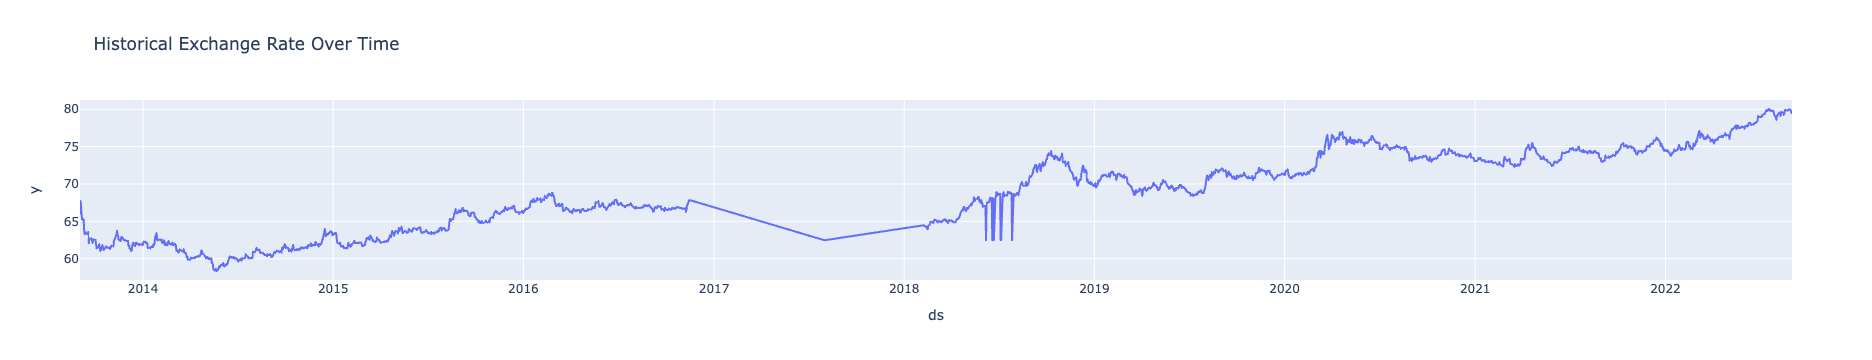

In [17]:
df = df.sort_values(by=['ds'])
fig = px.line(df, x="ds", y="y", title='Historical Exchange Rate Over Time')
fig.show()

In [19]:
model = Prophet()
model

In [20]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future_trends = model.make_future_dataframe(periods=120, freq='M')
display(future_trends.head())
display(future_trends.tail())

,ds
0,2013-09-02
1,2013-09-03
2,2013-09-04
3,2013-09-05
4,2013-09-06


,ds
2140,2032-04-30
2141,2032-05-31
2142,2032-06-30
2143,2032-07-31
2144,2032-08-31


In [22]:
forecast_trends = model.predict(future_trends)
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-09-02,63.622792,62.671218,64.793057,63.622792,63.622792,0.134117,0.134117,0.134117,-0.403830,-0.403830,-0.403830,0.537947,0.537947,0.537947,0.0,0.0,0.0,63.756908
1,2013-09-03,63.612110,62.615820,64.724276,63.612110,63.612110,0.080256,0.080256,0.080256,-0.441177,-0.441177,-0.441177,0.521434,0.521434,0.521434,0.0,0.0,0.0,63.692366
2,2013-09-04,63.601427,62.655310,64.747263,63.601427,63.601427,0.077851,0.077851,0.077851,-0.425075,-0.425075,-0.425075,0.502926,0.502926,0.502926,0.0,0.0,0.0,63.679278
3,2013-09-05,63.590745,62.593936,64.630279,63.590745,63.590745,0.021078,0.021078,0.021078,-0.461650,-0.461650,-0.461650,0.482728,0.482728,0.482728,0.0,0.0,0.0,63.611824
4,2013-09-06,63.580063,62.453010,64.626584,63.580063,63.580063,-0.019889,-0.019889,-0.019889,-0.481059,-0.481059,-0.481059,0.461170,0.461170,0.461170,0.0,0.0,0.0,63.560174


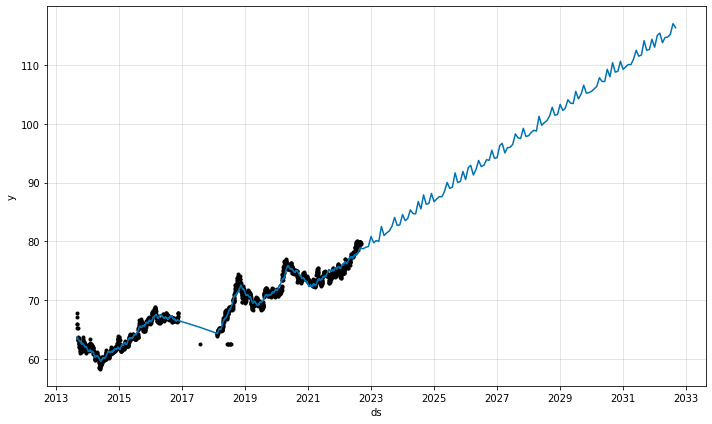

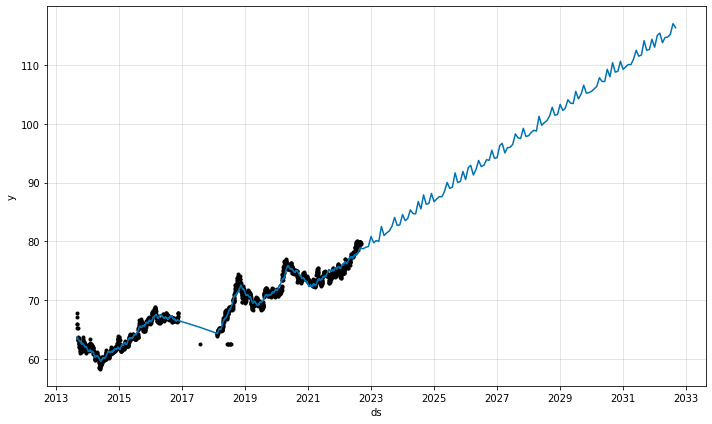

In [23]:
model.plot(forecast_trends, uncertainty=False)

In [24]:
forecast_trends = forecast_trends.set_index(['ds'])
forecast_trends.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2032-04-30,114.986714,-83.837869,315.186216,-84.104153,314.829864,-0.285573,-0.285573,-0.285573,-0.481059,-0.481059,-0.481059,0.195485,0.195485,0.195485,0.0,0.0,0.0,114.701140
2032-05-31,115.304972,-86.354328,317.072156,-85.547605,317.347088,-0.528008,-0.528008,-0.528008,-0.403830,-0.403830,-0.403830,-0.124178,-0.124178,-0.124178,0.0,0.0,0.0,114.776964
2032-06-30,115.612964,-87.629763,320.083654,-87.308623,320.025468,-0.355571,-0.355571,-0.355571,-0.425075,-0.425075,-0.425075,0.069504,0.069504,0.069504,0.0,0.0,0.0,115.257393
2032-07-31,115.931223,-87.965382,324.413594,-89.976910,323.644336,1.132335,1.132335,1.132335,1.106395,1.106395,1.106395,0.025940,0.025940,0.025940,0.0,0.0,0.0,117.063558
2032-08-31,116.249481,-91.012939,326.605251,-91.096111,326.752462,0.120070,0.120070,0.120070,-0.441177,-0.441177,-0.441177,0.561247,0.561247,0.561247,0.0,0.0,0.0,116.369551


In [27]:
forecast_trend_present = forecast_trends.iloc[:,17]
forecast_trend_present.tail()

ds
2032-04-30    114.701140
2032-05-31    114.776964
2032-06-30    115.257393
2032-07-31    117.063558
2032-08-31    116.369551
Name: yhat, dtype: float64

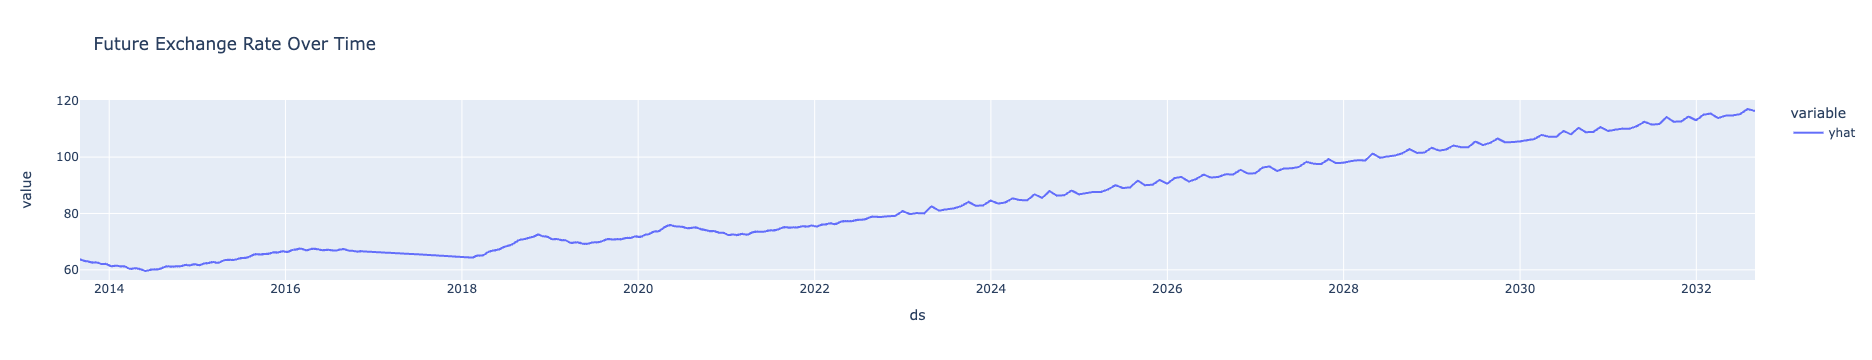

In [29]:
fig = px.line(forecast_trend_present, title='Future Exchange Rate Over Time')
fig.show()

### Calculating Investment Values Prior to Exchange

The next part of the project involves calculating the certified and fixed investment deposit values after 10 years for both the United States and India, respectively. To do this, it is necessary to make certain assumptions about the average certified deposit rate and the average fixed deposit rate in each country. These assumptions are based off of various bank websites in both the United States and India. For the purpose of this project, it is assumed that the average certified deposit rate is roughly 0.5% in both countries, while the average fixed deposit rate is roughly 6% in both countries. These assumptions will be used to calculate the potential returns on certified and fixed investment deposits over a 10-year period. 

In [11]:
us_invest = 100000
ind_invest = 100000

us_rate = 0.5
ind_rate = 6

time_period = 10

In [12]:
date = datetime.datetime(2021, 9, 1)

c = CurrencyRates()
curr_rate = c.get_rate('USD', 'INR', date)
display(curr_rate)
ind_invest = ind_invest * curr_rate
display(ind_invest)

73.07099940763307

7307099.940763307

In [13]:
def compound_interest(principle, rate, time):
 
    Amount = principle * (pow((1 + rate / 100), time))
    CI = Amount - principle
    return (CI)

In [34]:
us_compounded = us_invest + compound_interest(us_invest, us_rate, time_period)
ind_compounded = ind_invest + compound_interest(ind_invest, ind_rate, time_period)

In [35]:
display(us_compounded)
display(ind_compounded)

105114.01320407896

13085903.097324397

## Inputting Investment Into the Model for Results

After the certified and fixed investment deposit values for both the United States and India have been calculated and the data for India has been used in the exchange rate calculation, the final step is to convert the values for the fixed deposit in India back to US dollars using the future exchange rate prediction made by the model earlier. This will allow us to compare the final fixed deposit value to the current US dollar certified deposit value in order to determine which investment is likely to be more profitable over the 10-year period.

In [36]:
new_exchange = 116.369551
ind_compounded = ind_compounded / new_exchange
ind_compounded

112451.26396787762

In [37]:
us_compounded

105114.01320407896

## Results

In [45]:

print (ind_compounded / 100000)
print (us_compounded / 100000)
print ( 100*((ind_compounded-us_compounded) / us_compounded ))

1.1245126396787761
1.0511401320407896
6.980278404510516


#### After ten years, the investment in India is likely to end up returning 112,451.26 dollars and the investment in the United States is likely to end up returning 105,114.01 dollars, which is about a 7% greater return

## Conclusion 

After conducting a thorough analysis of the data, it was determined that the investment in India ended up bringing slightly better returns compared to a similar investment in the United States. This result was somewhat surprising, given the fact that there was a drastic increase in the exchange rate between the Indian Rupee and the US Dollar over the same time period. Despite this increase, the Indian investment still managed to yield a 7% greater return, which, while not an extremely significant difference, is still enough to pique the interest of potential investors.

There are a few reasons why this result might have occurred. One possibility is that the higher interest rate on fixed rate deposits in India more than compensated for the impact of the exchange rate fluctuation. It is also possible that other factors, such as market conditions and inflation, played a role in the relative performance of the two investments. Whatever the case may be, the fact remains that the investment in India ended up being slightly more profitable than the investment in the United States, at least over the time frame that was studied.

The Facebook Prophet linear regression model was a good fit for this project because it provided a simple, straightforward prediction for a direct, same-value, one component comparison. This type of model is particularly well-suited for situations where there is a single dependent variable and a single independent variable, and the goal is to understand how changes in the independent variable impact the dependent variable. In the context of this project, the independent variable was the exchange rate between the Indian Rupee and the US Dollar, and the dependent variable was the investment return. By using a linear regression model, it was possible to make a prediction about how the exchange rate might change over time and to use this prediction to compare the potential returns of investments in the two countries. While this model was sufficient for the purposes of this project, it is worth noting that there are other approaches that might be more suitable for more nuanced analyses. One possibility is to use Long Short Term Memory (LSTM) networks, which are a type of neural network that is specifically designed to analyze sequential data and to consider multiple factors and patterns when making predictions.

One of the limitations of this project was the fact that the model was not validated using a larger dataset. While the model was able to make relatively accurate predictions based on the data that was available, it is possible that the results could have been even more accurate if more data had been used to train and validate the model. This is because more data can help to improve the model's ability to generalize to new situations, and it can also help to reduce the risk of overfitting, which is when a model becomes too closely tied to the specific characteristics of the training data. Unfortunately, data beyond the scope of this project was not accessible through the API that was used, which means that it was not possible to validate the model using a larger dataset. While this limitation is certainly unfortunate, it is important to note that the results of the analysis are still valuable and provide a useful starting point for further investigation. Even with a relatively small dataset, the model was able to make reasonably accurate predictions about the future exchange rate between the Indian Rupee and the US Dollar, and it was able to provide valuable insights into the potential risks and rewards of investing in India. While it would have been ideal to have more data to work with, the results of the analysis are still useful and provide a foundation for future research on this topic.

In conclusion, this project was a valuable exercise that helped to shed light on the potential risks and rewards of investing in India. By using a machine learning regression model to predict the future exchange rate between the Indian Rupee and the US Dollar, and by comparing the potential returns of a long-term, fixed rate investment in India versus a similar investment in the United States over a 10 year period, it was possible to gain a better understanding of the factors that might impact the performance of these investments.While there were certainly some limitations and potential shortcomings to this project, the results are still useful and provide a useful starting point for further investigation. One limitation is the fact that the model was not validated using a larger dataset, which could have potentially improved the accuracy of the predictions. Additionally, the model used in this analysis was a relatively simple linear regression model, which may not have been able to take into account all of the complex variables that can impact the performance of an investment. Despite these limitations, the results of the analysis are still valuable and provide a useful starting point for further research on this topic. Overall, this project highlights the importance of carefully considering the potential risks and rewards of any investment, and it demonstrates the value of using machine learning techniques to make more informed decisions. While it is always important to do your own research and carefully consider the risks and potential returns of any investment before making a decision, the insights and predictions generated by this project can be a useful tool for anyone interested in maximizing their financial returns.
